# MRI maps

In [3]:
%cd work/notebooks

/home/jovyan/work/notebooks


In [4]:
# Import modules and R
import numpy as np, pandas as pd
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

In [5]:
import sys
sys.path.append('/home/jovyan/work/code')
from processing_helpers import *
from analysis_helpers import *
from mri_maps import *
from gradientVersion import *
%R source("../code/Rplots.R");
%R source("../code/brainPlots.R");
%R source("../code/plot_maps.R");

System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down


In [6]:
dme_3d_ds5 = gradientVersion().fit('hcp_3donors_ds5')
scores = dme_3d_ds5.clean_scores()
weights = dme_3d_ds5.weights.iloc[:, :3]

New gradients version: method=dm, kernel=normalized_angle, sparsity=0, data=hcp_3donors_ds5


In [7]:
scores = dme_3d_ds5.clean_scores().melt(id_vars='label', var_name='G', value_name='G_score')
scores

,label,G,G_score
0,V1,G1,2.118017
1,V2,G1,2.048004
2,V3,G1,2.032776
3,V4,G1,1.628816
4,4,G1,1.265492
...,...,...,...
406,A4,G3,-1.351498
407,STSva,G3,-0.269910
408,TE1m,G3,-0.818115
409,PI,G3,0.052286


In [114]:
metadata = pd.read_csv("../data/allen_single_cell_metadata.csv") 
metadata['cell_type'] = np.where(metadata['class_label']=='Non-neuronal', metadata['subclass_label'], 
                                 metadata['class_label'].map({'Glutamatergic':'Neuro-Ex','GABAergic':'Neuro-In'}))
metadata['layer'] = metadata['cortical_layer_label'].str[:2]
metadata.head().T

,0,1,2,3,4
sample_name,F2S4_160113_027_A01,F2S4_160113_027_B01,F2S4_160113_027_C01,F2S4_160113_027_D01,F2S4_160113_027_E01
exp_component_name,LS-15005h_S01_E1-50,LS-15005h_S02_E1-50,LS-15005h_S03_E1-50,LS-15005h_S04_E1-50,LS-15005h_S05_E1-50
specimen_type,nucleus,nucleus,nucleus,nucleus,nucleus
cluster_color,NaN,#E170FE,#8E5864,#8B5862,#CF6EC9
cluster_order,NaN,32.0,2.0,1.0,34.0
cluster_label,NaN,Inh L2-5 VIP TOX2,Inh L1 LAMP5 GGT8P,Inh L1 LAMP5 NDNF,Inh L1-3 VIP ZNF322P1
class_color,NaN,#0066FF,#0066FF,#0066FF,#0066FF
class_order,NaN,4.0,4.0,4.0,4.0
class_label,NaN,GABAergic,GABAergic,GABAergic,GABAergic
subclass_color,NaN,#996517,#FF7373,#FF7373,#996517


## See if positive and negative genes are anticorrelated

In [33]:
sc_axes_posneg.corr()

,G1-,G2-,G3-,G1+,G2+,G3+
G1-,1.000000,-0.100991,0.088440,0.895035,0.004305,0.141176
G2-,-0.100991,1.000000,0.436201,-0.183322,0.853761,0.401640
G3-,0.088440,0.436201,1.000000,-0.210929,0.065352,0.945557
G1+,0.895035,-0.183322,-0.210929,1.000000,0.031333,-0.236350
G2+,0.004305,0.853761,0.065352,0.031333,1.000000,0.014630
G3+,0.141176,0.401640,0.945557,-0.236350,0.014630,1.000000


In [35]:
sc_axes_posneg100.corr()

,G1-,G2-,G3-,G1+,G2+,G3+
G1-,1.000000,0.086857,0.260295,-0.407082,0.115467,-0.306840
G2-,0.086857,1.000000,0.290258,0.115765,-0.255507,-0.237406
G3-,0.260295,0.290258,1.000000,0.253906,0.289873,-0.712710
G1+,-0.407082,0.115765,0.253906,1.000000,0.145919,-0.368820
G2+,0.115467,-0.255507,0.289873,0.145919,1.000000,-0.312513
G3+,-0.306840,-0.237406,-0.712710,-0.368820,-0.312513,1.000000


In [108]:
metadata.columns

Index(['sample_name', 'exp_component_name', 'specimen_type', 'cluster_color',
       'cluster_order', 'cluster_label', 'class_color', 'class_order',
       'class_label', 'subclass_color', 'subclass_order', 'subclass_label',
       'full_genotype_color', 'full_genotype_order', 'full_genotype_label',
       'donor_sex_color', 'donor_sex_order', 'donor_sex_label', 'region_color',
       'region_order', 'region_label', 'cortical_layer_color',
       'cortical_layer_order', 'cortical_layer_label',
       'cell_type_accession_color', 'cell_type_accession_order',
       'cell_type_accession_label', 'cell_type_alias_color', 'cell_type_order',
       'cell_type_alias_label', 'cell_type_alt_alias_color',
       'cell_type_alt_alias_order', 'cell_type_alt_alias_label',
       'cell_type_designation_color', 'cell_type_designation_order',
       'cell_type_designation_label', 'external_donor_name_color',
       'external_donor_name_order', 'external_donor_name_label',
       'outlier_call', 'outli

In [115]:
# sc_axes_posneg_plot = pd.concat([
#     sc_axes_posneg.iloc[:,:3].set_axis(['G1','G2','G3'],axis=1).melt(var_name='G',value_name='neg'),
#     sc_axes_posneg.iloc[:,3:].set_axis(['G1','G2','G3'],axis=1).melt(var_name='G',value_name='pos').drop('G', axis=1)
# ], axis=1)

sc_axes_pos = sc_axes_posneg.iloc[:,:3].set_axis(['G1','G2','G3'],axis=1).stack().rename('negative')
sc_axes_neg = sc_axes_posneg.iloc[:,3:].set_axis(['G1','G2','G3'],axis=1).stack().rename('positive')
sc_axes_melt = sc_axes_pos.to_frame().join(sc_axes_neg).reset_index(1).rename({'level_1':'G'}, axis=1)

sc_axes_posneg_plot = (
    metadata.loc[:,['class_label','subclass_label','region_label','layer','cell_type','outlier_call']]
    .join(sc_axes_melt)
    .query("~outlier_call")
)


sc_axes_posneg_plot

,class_label,subclass_label,region_label,layer,cell_type,outlier_call,G,negative,positive
1,GABAergic,VIP,MTG,L1,Neuro-In,False,G1,-2251.118873,2031.649567
1,GABAergic,VIP,MTG,L1,Neuro-In,False,G2,-1036.540089,962.271177
1,GABAergic,VIP,MTG,L1,Neuro-In,False,G3,-998.380234,531.145864
2,GABAergic,LAMP5,MTG,L1,Neuro-In,False,G1,-2019.855698,2194.008787
2,GABAergic,LAMP5,MTG,L1,Neuro-In,False,G2,-1077.052736,906.814309
...,...,...,...,...,...,...,...,...,...
49415,Non-neuronal,Oligodendrocyte,A1C,WM,Oligodendrocyte,False,G2,-883.114832,1059.021393
49415,Non-neuronal,Oligodendrocyte,A1C,WM,Oligodendrocyte,False,G3,-701.905226,1003.734632
49416,Non-neuronal,Oligodendrocyte,A1C,WM,Oligodendrocyte,False,G1,-1913.624807,2020.492344
49416,Non-neuronal,Oligodendrocyte,A1C,WM,Oligodendrocyte,False,G2,-889.532249,1075.877259


In [140]:
# sc_axes_posneg_plot['cell_type'].value_counts()
# sc_axes_posneg_plot['subclass_label'].value_counts()

IT                 65523
L4 IT              11175
VIP                10599
PVALB               8400
L6 CT               7668
LAMP5               7302
SST                 7074
Oligodendrocyte     5790
Astrocyte           3561
L6b                 3240
L5/6 IT Car3        3159
L5/6 NP             2448
OPC                 2319
Microglia           2250
PAX6                 975
L5 ET                474
Endothelial          210
Pericyte              96
VLMC                  33
Name: subclass_label, dtype: int64

[1] 2799


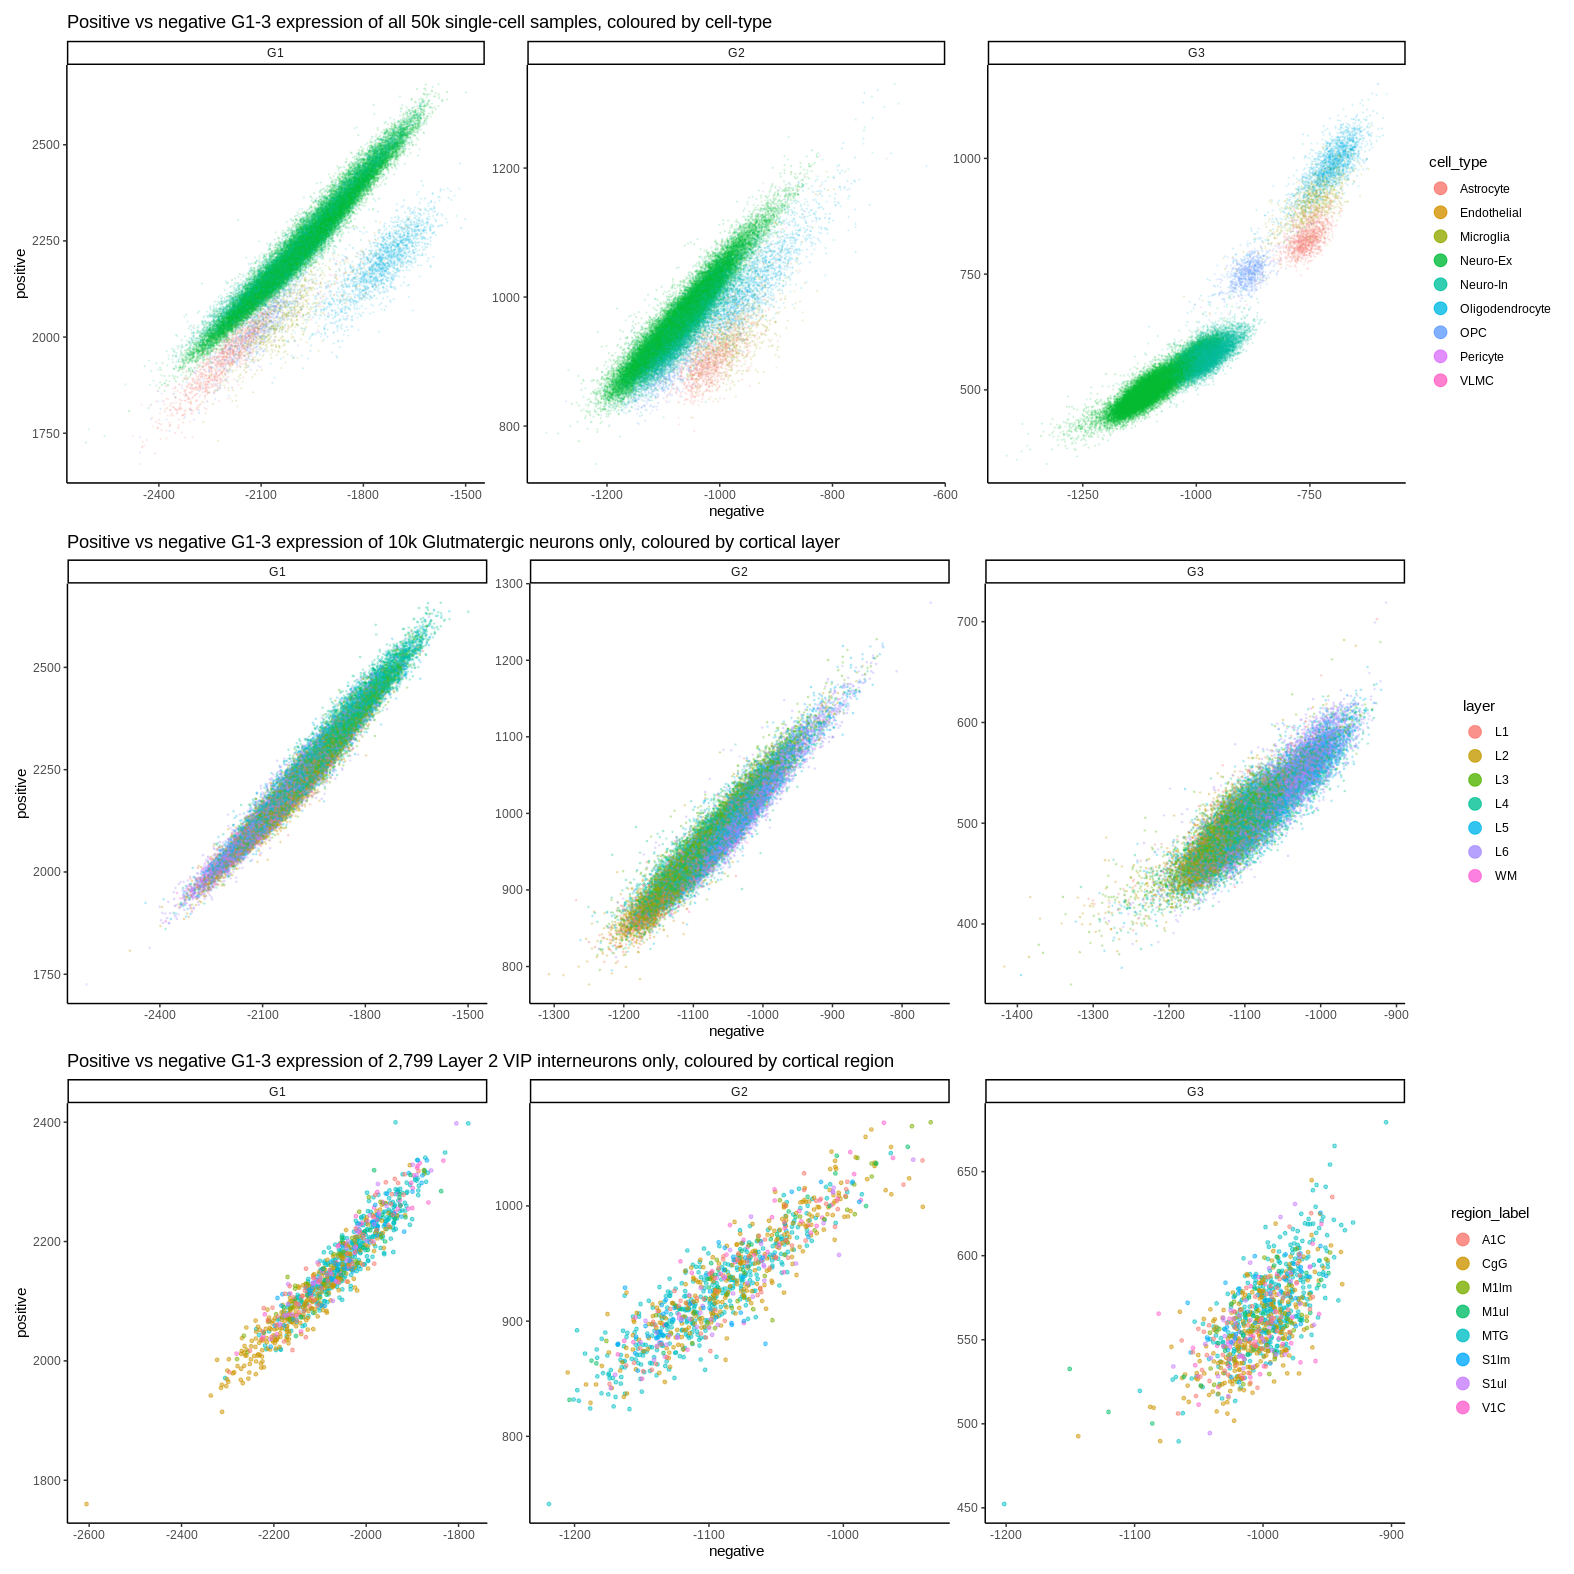

In [145]:
%%R -i sc_axes_posneg_plot -w 40 -h 40 -u cm -r 100

g1 <- sc_axes_posneg_plot %>% 
# filter(region_label == 'A1C') %>%  
ggplot(aes(negative, positive)) + 
facet_wrap(~G, scales='free') + 
geom_point(alpha=.1, size=.2, 
    aes(color=cell_type)) + 
    # aes(color=layer)) + 
guides(colour = guide_legend(override.aes = list(size=4, alpha=.8))) +
theme_classic() + 
theme(aspect.ratio=1) + 
ggtitle('Positive vs negative G1-3 expression of all 50k single-cell samples, coloured by cell-type')

g2 <- sc_axes_posneg_plot %>% 
# filter(region_label == 'A1C') %>% 
filter(cell_type == 'Neuro-Ex') %>% 
ggplot(aes(negative, positive)) + 
facet_wrap(~G, scales='free') + 
geom_point(alpha=.2, size=.3, 
    # aes(color=cell_type)) + 
    aes(color=layer)) +
guides(colour = guide_legend(override.aes = list(size=4, alpha=.8))) +
theme_classic() + 
theme(aspect.ratio=1) +
ggtitle('Positive vs negative G1-3 expression of 10k Glutmatergic neurons only, coloured by cortical layer')

g3 <- sc_axes_posneg_plot %>% 
# filter(region_label == 'A1C') %>% 
# filter(cell_type == 'Neuro-Ex') %>% 
# filter(subclass_label %in% c('SST','PVALB')) %>% 
filter(layer == 'L2') %>% 
filter(subclass_label == 'VIP') %>% 
ggplot(aes(negative, positive)) + 
facet_wrap(~G, scales='free') + 
geom_point(alpha=.5, size=1, 
    # aes(color=subclass_label)) + 
    aes(color=region_label)) +
guides(colour = guide_legend(override.aes = list(size=4, alpha=.8))) +
theme_classic() + 
theme(aspect.ratio=1) +
# ggtitle('Positive vs negative G1-3 expression of 8,400 PVALB and 7,074 SST interneurons only')
ggtitle('Positive vs negative G1-3 expression of 2,799 Layer 2 VIP interneurons only, coloured by cortical region')
 
sc_axes_posneg_plot %>% 
filter(layer == 'L2') %>% 
filter(subclass_label == 'VIP') %>% nrow() %>% print

g1 / g2 / g3

## Try correlating matched regions?

In [19]:
metadata = pd.read_csv("../data/allen_single_cell_metadata.csv")

region_mapping = {
    'V1C':'V1',
    'M1ul':'4',
    'M1lm':'4',
    'S1ul':'1',
    'S1lm':'1',
    'A1C':'A1',
    'MTG':'TE1m',
    'CgG':'a24'
}

metadata['region'] = metadata['region_label'].map(region_mapping)
metadata['cell_type'] = np.where(metadata['class_label']=='Non-neuronal', metadata['subclass_label'], 
                                 metadata['class_label'].map({'Glutamatergic':'Neuro-Ex','GABAergic':'Neuro-In'}))

In [23]:
sc = (pd.read_csv("../data/allen_single_cell_G123_log10.csv", index_col=0)
      .set_axis(['G1','G2','G3'], axis=1)
      .join(metadata[['class_label','region']])
      .loc[metadata['outlier_call']==False, :]
      .loc[metadata['cortical_layer_label']!='WM', :]
      .groupby(['class_label', 'region'])
      .mean()
      .groupby('class_label')
      .apply(lambda x: (x-np.mean(x))/np.std(x))
      .melt(ignore_index=False, var_name='G', value_name='sc_score')
      .set_index('G', append=True)
      )
sc.head()
# sc.shape

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


sc_score
class_label region G           
GABAergic   1      G1  0.174784
            4      G1  0.100168
            A1     G1 -0.311225
            TE1m   G1 -0.169481
            V1     G1  1.807674

In [42]:
(sc.join(scores.rename({'label':'region'}, axis=1).set_index(['G','region']))
    .sort_values(['G','class_label'])
    .reset_index().loc[lambda x: x['region']!='TE1m']
#  .reset_index().loc[lambda x: x['cortical_layer_label']=='L4']
    .groupby(['G','class_label']).corr()
    .loc[pd.IndexSlice[:,:,'sc_score'],'G_score']
    .unstack(0)
)

,G,G1,G2,G3
class_label,,,,
GABAergic,sc_score,0.841134,-0.079040,0.138260
Glutamatergic,sc_score,0.901972,0.610832,0.444402
Non-neuronal,sc_score,0.901371,0.650857,0.582940


In [36]:
pd.read_csv("../data/allen_single_cell_matrix.csv", nrows=10, usecols=matching_column_indices).add(1).pipe(np.log10)

,A1BG,A1BG-AS1,AAAS,AAED1,AAGAB,AAK1,AARD,AARS,AASDH,AATF,...,ZSCAN29,ZSCAN31,ZSCAN5A,ZSCAN9,ZSWIM4,ZSWIM7,ZWINT,ZYX,ZZEF1,ZZZ3
0,0.000000,0.0,0.000000,0.0,0.000000,2.806180,0.000000,0.301030,0.778151,0.000000,...,1.447158,0.301030,0.0,0.0,0.00000,0.301030,0.0,1.623249,2.652246,0.000000
1,2.075547,0.0,0.301030,0.0,2.840106,2.663701,0.000000,2.617000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.30103,2.049218,0.0,0.000000,0.000000,2.874482
2,0.000000,0.0,0.000000,0.0,0.000000,2.995196,1.770852,0.698970,0.301030,0.000000,...,0.000000,0.301030,0.0,0.0,0.00000,0.000000,0.0,0.000000,2.012837,0.000000
3,2.204120,0.0,0.000000,0.0,0.000000,2.178977,0.000000,1.799341,2.278754,0.698970,...,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.602060,0.301030
4,0.301030,0.0,0.000000,0.0,0.301030,2.313867,0.000000,1.869232,2.350248,0.000000,...,0.000000,1.041393,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.698970,1.531479
5,1.041393,0.0,0.000000,0.0,0.000000,2.460898,0.000000,2.332438,0.301030,0.000000,...,0.301030,2.079181,0.0,0.0,0.00000,1.041393,0.0,0.000000,0.954243,2.518514
6,0.000000,0.0,0.000000,0.0,1.176091,2.746634,0.000000,0.477121,0.301030,0.000000,...,0.000000,1.000000,0.0,0.0,0.00000,1.146128,0.0,0.000000,1.361728,0.000000
7,0.301030,0.0,0.000000,0.0,2.161368,2.588832,0.000000,0.000000,2.143015,0.000000,...,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,1.897627,2.173186
8,0.000000,0.0,0.477121,0.0,2.000000,2.634477,0.000000,0.000000,2.017033,1.431364,...,0.000000,2.720986,0.0,0.0,0.60206,0.000000,0.0,1.857332,1.959041,2.264818
9,0.000000,0.0,0.000000,0.0,1.342423,1.832509,0.000000,1.041393,0.301030,0.000000,...,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,1.778151,0.778151,1.845098


In [119]:
metadata.groupby(['region_label','cell_type'])['sample_name'].count().unstack(0)

region_label,A1C,CgG,M1lm,M1ul,MTG,S1lm,S1ul,V1C
cell_type,,,,,,,,
Astrocyte,187.0,262.0,133.0,58.0,373.0,55.0,60.0,59.0
Endothelial,7.0,6.0,8.0,3.0,18.0,9.0,13.0,6.0
Microglia,130.0,106.0,47.0,37.0,246.0,64.0,64.0,56.0
Neuro-Ex,4038.0,3281.0,1993.0,1601.0,10324.0,1743.0,1877.0,6372.0
Neuro-In,1690.0,1936.0,787.0,793.0,3784.0,647.0,836.0,977.0
OPC,97.0,155.0,46.0,30.0,255.0,46.0,41.0,103.0
Oligodendrocyte,316.0,189.0,195.0,219.0,501.0,119.0,118.0,273.0
Pericyte,4.0,2.0,3.0,1.0,13.0,2.0,3.0,4.0
VLMC,1.0,2.0,1.0,NaN,5.0,NaN,1.0,1.0


## Project to G123 by positive and negative (do once)

In [8]:
genes_to_match = set(weights.index)
all_columns = pd.read_csv("../data/allen_single_cell_matrix.csv", nrows=1).columns
matching_column_indices = [i for i, e in enumerate(all_columns) if e in genes_to_match]

weights_matched = weights.loc[list(set(all_columns).intersection(genes_to_match)),:]

In [36]:
weights_posneg1000 = (pd.concat([
    weights_matched.rank(ascending=True).set_axis([f'G{i+1}-' for i in range(3)], axis=1),
    weights_matched.rank(ascending=False).set_axis([f'G{i+1}+' for i in range(3)], axis=1)
], axis=1)
    .applymap(lambda x: np.where(x<1000,1,0))
)
weights_posneg1000

,G1-,G2-,G3-,G1+,G2+,G3+
CCDC144B,0,1,0,0,0,0
C21orf91,0,0,0,0,0,1
TTTY15,0,0,0,0,0,0
SCN3A,1,0,0,0,0,0
EIF4E,0,0,0,0,0,0
...,...,...,...,...,...,...
WDFY2,0,1,0,0,0,1
MFSD6,0,0,0,0,0,0
STMN1,0,0,1,0,0,0
CDH4,1,0,0,0,0,0


In [146]:
sc_axes_posneg1000 = (
    pd.read_csv("../data/allen_single_cell_matrix.csv", header=0, usecols=matching_column_indices)
    .add(1)
    .pipe(np.log10)
    .pipe(lambda x: x/x.mean(axis=1).values[:,None])
    .dot(weights_posneg1000)
)
sc_axes_posneg1000

,G1-,G2-,G3-,G1+,G2+,G3+
0,987.950761,1386.863105,1288.901665,1229.032928,731.333289,613.973267
1,1125.079863,1207.217452,1237.594093,1134.239894,860.148287,601.171588
2,993.916653,1273.628568,1140.520584,1224.773901,829.444362,733.944742
3,1034.203302,1222.250306,1211.069996,1163.705991,828.998681,657.104995
4,968.924317,1270.936913,1217.706563,1219.917341,847.773990,676.308034
...,...,...,...,...,...,...
49412,1104.270628,1092.025290,806.882814,896.536695,828.511141,1165.799817
49413,1178.402493,1273.999790,1385.590210,1026.179896,831.153570,556.503881
49414,1046.375383,1131.862955,1205.824345,1094.674627,903.350243,605.243495
49415,755.799898,1032.555250,856.800976,978.329878,869.285328,1475.405890


In [147]:
sc_axes_posneg1000.to_csv("../data/allen_single_cell_G123_posneg1000.csv")

In [148]:
weights_posneg = pd.concat([
    weights_matched.applymap(lambda x: np.where(x<0, -x, 0)).set_axis([f'G{i+1}-' for i in range(3)], axis=1),
    weights_matched.applymap(lambda x: np.where(x>0, x, 0)).set_axis([f'G{i+1}+' for i in range(3)], axis=1)
], axis=1)
weights_posneg

,G1-,G2-,G3-,G1+,G2+,G3+
CCDC144B,0.000000,0.468235,0.130737,0.459802,0.000000,0.000000
C21orf91,0.000000,0.000000,0.000000,0.297870,0.045858,0.429406
TTTY15,0.000000,0.000000,0.254870,0.497610,0.064289,0.000000
SCN3A,0.800556,0.299472,0.224112,0.000000,0.000000,0.000000
EIF4E,0.000000,0.172929,0.075954,0.583510,0.000000,0.000000
...,...,...,...,...,...,...
WDFY2,0.416336,0.380046,0.000000,0.000000,0.000000,0.453769
MFSD6,0.115203,0.000000,0.092651,0.000000,0.188534,0.000000
STMN1,0.630111,0.135765,0.357859,0.000000,0.000000,0.000000
CDH4,0.803523,0.102987,0.213840,0.000000,0.000000,0.000000


In [149]:
sc_axes_posneg = (
    pd.read_csv("../data/allen_single_cell_matrix.csv", header=0, usecols=matching_column_indices)
    .add(1)
    .pipe(np.log10)
    .pipe(lambda x: x/x.mean(axis=1).values[:,None])
    .dot(weights_posneg)
)

In [150]:
sc_axes_posneg.to_csv("../data/allen_single_cell_G123_posneg.csv")

In [151]:
weights_posneg_r04 = pd.concat([
    weights_matched.applymap(lambda x: np.where(x<-0.4, -x, 0)).set_axis([f'G{i+1}-' for i in range(3)], axis=1),
    weights_matched.applymap(lambda x: np.where(x>0.4, x, 0)).set_axis([f'G{i+1}+' for i in range(3)], axis=1)
], axis=1)
weights_posneg_r04

,G1-,G2-,G3-,G1+,G2+,G3+
CCDC144B,0.000000,0.468235,0.0,0.459802,0.0,0.000000
C21orf91,0.000000,0.000000,0.0,0.000000,0.0,0.429406
TTTY15,0.000000,0.000000,0.0,0.497610,0.0,0.000000
SCN3A,0.800556,0.000000,0.0,0.000000,0.0,0.000000
EIF4E,0.000000,0.000000,0.0,0.583510,0.0,0.000000
...,...,...,...,...,...,...
WDFY2,0.416336,0.000000,0.0,0.000000,0.0,0.453769
MFSD6,0.000000,0.000000,0.0,0.000000,0.0,0.000000
STMN1,0.630111,0.000000,0.0,0.000000,0.0,0.000000
CDH4,0.803523,0.000000,0.0,0.000000,0.0,0.000000


In [152]:
(weights_posneg_r04 != 0).sum()

G1-    3008
G2-     751
G3-     506
G1+    2661
G2+     950
G3+     522
dtype: int64

In [153]:
sc_axes_posneg_r04 = (
    pd.read_csv("../data/allen_single_cell_matrix.csv", header=0, usecols=matching_column_indices)
    .add(1)
    .pipe(np.log10)
    .pipe(lambda x: x/x.mean(axis=1).values[:,None])
    .dot(weights_posneg_r04)
)

In [ ]:
sc_axes_posneg.to_csv("../data/allen_single_cell_G123_posneg.csv")

## Project to G123 (do once)

In [250]:
pd.read_csv("../data/allen_single_cell_matrix.csv", nrows=10)

,sample_name,3.8-1.2,3.8-1.3,3.8-1.4,3.8-1.5,5-HT3C2,A1BG,A1BG-AS1,A1CF,A2M,...,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZZEF1,ZZZ3,bA255A11.4,bA395L14.12
0,F2S4_160113_027_A01,0,0,0,0,0,0,0,0,41,...,0,282,0,0,0,41,448,0,0,1
1,F2S4_160113_027_B01,0,0,0,0,0,118,0,0,0,...,0,892,0,0,125,0,0,748,0,0
2,F2S4_160113_027_C01,0,0,0,0,0,0,0,0,0,...,0,0,1,0,161,0,102,0,0,0
3,F2S4_160113_027_D01,0,0,0,0,0,159,0,0,0,...,0,155,1,0,81,0,3,1,0,0
4,F2S4_160113_027_E01,0,0,0,0,0,1,0,0,1,...,0,14,1,0,490,0,4,33,0,0
5,F2S4_160113_027_F01,0,0,0,0,0,10,0,0,0,...,0,48,0,0,4,0,8,329,0,0
6,F2S4_160113_027_G01,0,0,0,0,0,0,0,0,231,...,0,0,0,0,61,0,22,0,0,0
7,F2S4_160113_028_B01,0,0,0,0,0,1,0,0,0,...,0,342,0,0,13,0,78,148,0,0
8,F2S4_160113_028_C01,0,0,0,0,0,0,0,0,0,...,0,55,0,0,8,71,90,183,0,0
9,F2S4_160113_028_F01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,116,59,5,69,0,0


In [16]:
genes_to_match = set(weights.index)
all_columns = pd.read_csv("../data/allen_single_cell_matrix.csv", nrows=1).columns
matching_column_indices = [i for i, e in enumerate(all_columns) if e in genes_to_match]

weights_matched = weights.loc[list(set(all_columns).intersection(genes_to_match)),:]

In [17]:
sc_axes_log10 = (
    pd.read_csv("../data/allen_single_cell_matrix.csv", header=0, usecols=matching_column_indices)
    .add(1)
    .pipe(np.log10)
    .dot(weights_matched)
)

In [18]:
sc_axes_log10.to_csv("../data/allen_single_cell_G123_log10.csv")